# Test Case 1

## 1. Theory

The first case to be considered is the determination of the plane wave reflection coefficient according to the measured pressure. A source $\mathbf{s}$ generates a plane wave $P(r)=Pe^{jkr}$, that reaches the receiver $\mathbf{r}$ by the direct path $r_1$ and the reflected $r_2$.

![title](planewave.png)

In the frequency domain, the total pressure measured at $\mathbf{r}$, $P_t$, is the sum of the direct and reflected sound.

$$P_t=P\Bigg(\frac{H_1}{r_1}e^{jkr_1}+\frac{H_2}{r_2}R_pe^{jkr_2}\Bigg)$$

where $H_1$ is the directivity response of the source in the direct path, $H_2$ the directivity response in the reflected path and $R_p$ the plane wave reflection coefficient, defined as the ratio between direct and reflected sound pressure.

$$R_p(\alpha)=\frac{p_r}{p_i}=\frac{Z_s\cos(\alpha)-\rho c}{Z_s\cos(\alpha)+\rho c}$$

Usually, the desired value is the ground effect which is

$$\frac{P_t}{P_1}=H_1+H_2\frac{r_1}{r_2}R_pe^{jk{\Delta r}},$$

where $P_1=\frac{P}{r_1}e^{jkr_1}$ is the pressure that reaches the receiver through the direct path and $\Delta r=r_2-r_1$.The reflection coefficient is dependent on the surface impedace of the material $Z_s$, the angle of incidence $\alpha$, the speed of sound $c=20.05\sqrt{273.15+t_0}$, being $t_0$ the measured temperature in celsius, and the density of air $\rho$. Thanks to the previous work done by other authors like Delaney and Bazley the surface impedance of porous materials can be approximated by a power law expression dependent on a parameter common for all the frequencies that defines the material. This is the flow resistivity $\sigma$, given in [Ns/m$^4]$

$$Z_s=\rho c\Bigg(1+9.08\Bigg(\frac{1000f}{\sigma}\Bigg)^{-0.75}-j11.9\Bigg(\frac{1000f}{\sigma}\Bigg)^{-0.73}\Bigg)$$.

This expression was improved by Miki et al. defining it in a causal form

$$Z_s=\rho c\Bigg(1+5.51\Bigg(\frac{1000f}{\sigma}\Bigg)^{-0.632}-j8.42\Bigg(\frac{1000f}{\sigma}\Bigg)^{-0.632}\Bigg)$$.

It can be seen that inferring $\sigma$ the impedance and therefore the reflection coefficient are also inferred. In order to infer the flow resistivity of the surface from measurements using STAN, real and imaginary parts need to be isolated as complex numbers are not supported by the platform. Therefore we will have for each frequency band the following (subindexes $r$ and $i$ represent real and imaginary parts respectively)

$$\text{Re}\left(\frac{P_t}{P_1}\right)=H_{1r}+\frac{r_1}{r_2}\Bigg((H_{2r}R_{pr}-H_{2i}R_{pi})\cos(k\Delta r)-(H_{2r}R_{pi}+H_{2i}R_{pr})\sin(k\Delta r)\Bigg)$$
$$\text{Im}\left(\frac{P_t}{P_1}\right)=H_{1i}+\frac{r_1}{r_2}\Bigg((H_{2r}R_{pr}-H_{2i}R_{pi})\sin(k\Delta r)+(H_{2r}R_{pi}+H_{2i}R_{pr})\cos(k\Delta r)\Bigg)$$

The surface impedance then can be defined as

$$Z_s=\rho c(A+jB)$$

and the reflection coefficient

$$R_p=\frac{(A+jB)\cos(\alpha)-1}{(A+jB)\cos(\alpha)+1}=\frac{A\cos(\alpha)-1+jB\cos(\alpha)}{A\cos(\alpha)+1+jB\cos(\alpha)}=\frac{[A\cos(\alpha)-1+jB\cos(\alpha)][A\cos(\alpha)+1-jB\cos(\alpha)]}{[A\cos(\alpha)+1+jB\cos(\alpha)][A\cos(\alpha)+1-jB\cos(\alpha)]}=\frac{(A\cos(\alpha))^2-1-jAB\cos^2(\alpha)+jB\cos(\alpha)+jAB\cos^2(\alpha)+jB\cos(\alpha)+(B\cos(\alpha))^2}{(A\cos(\alpha)+1)^2+(B\cos(\alpha))^2}=\frac{(A\cos(\alpha))^2-1+(B\cos(\alpha))^2+j(2B\cos(\alpha))}{(A\cos(\alpha)+1)^2+(B\cos(\alpha))^2}=\frac{(A^2+B^2)\cos^2(\alpha)-1+j2B\cos(\alpha)}{(A\cos(\alpha)+1)^2+(B\cos(\alpha))^2}$$

Real and imaginary

$$\text{Re}(R_p)=R_{pr}=\frac{(A^2+B^2)\cos^2(\alpha)-1}{(A\cos(\alpha)+1)^2+(B\cos(\alpha))^2}$$
$$\text{Im}(R_p)=R_{pi}=\frac{2B\cos(\alpha)}{(A\cos(\alpha)+1)^2+(B\cos(\alpha))^2}$$

where

$$A=1+5.51\Bigg(\frac{1000f}{\sigma}\Bigg)^{-0.632}$$
$$B=-8.42\Bigg(\frac{1000f}{\sigma}\Bigg)^{-0.632}$$

For the simplest case where $P=H_1=H_2=1$ (monopole), we have

$$\text{Re}\left(\frac{P_t}{P_1}\right)=1+\frac{r_1}{r_2}(R_{pr}\cos(k\Delta r)-R_{pi}\sin(k\Delta r))$$
$$\text{Im}\left(\frac{P_t}{P_1}\right)=\frac{r_1}{r_2}\left(R_{pr}\sin(k\Delta r)+R_{pi}\cos(k\Delta r)\right)$$

The dependency between variables is

![title](Inference_Diagram.png)

The measured total pressure and the coordinates of source and receiver will be noisy versions of the theoretical values. Therefore, the proposed model is

$$ \text{Re}\left(\frac{P_t}{P_1}\right)\sim N\left(1+\frac{r_1}{r_2}(R_{pr}\cos(k\Delta r)-R_{pi}\sin(k\Delta r)), real_{dev}\right)$$
$$ \text{Im}\left(\frac{P_t}{P_1}\right)\sim N\left(\frac{r_1}{r_2}\left(R_{pr}\sin(k\Delta r)+R_{pi}\cos(k\Delta r)\right), imag_{dev}\right)$$
$$ \sigma\sim \text{Laplace}(\sigma_{mean},\sigma_{dev})$$
$$ s\sim N(s_{meas},r_{dev})$$
$$ r\sim N(r_{meas},r_{dev})$$



## Imports

In [38]:
%matplotlib inline
from __future__ import division
import numpy as np
import scipy as sc
import pystan
from psis import psisloo
import math
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from matplotlib import gridspec

## 2. Synthetic data

To valide our model on the simplest possible case, we use synthetic measurements. The parameters that we know or can measure are:
1. Total pressure: $P_t$.
2. Temperature: $T$. Accuracy $\pm 0.2^{\circ}$C (Vaisala WTS520).
3. Coordinates: $\mathbf{s}$ and $\mathbf{r}$. Accuracy $\pm 0.015$ m. Also inaccuracy due to the bad manipulation of the device should be included.
4. Flow resistivity: $\sigma$. We know an approximation but we want to infer it. Nord2000 and Nordtest ranges. In this case, lets assume the case of compacted field and gravel $\rightarrow$ 500 [kNs/m$^4$].
5. Directivity and source signals: We will assume they are equal to one.

Our test data consists of fixed values for these measurables as well as 23 log-distributed frequency measurements (one third ocave bands) in the audible spectrum (a synthetic replacement for real sound measurements).

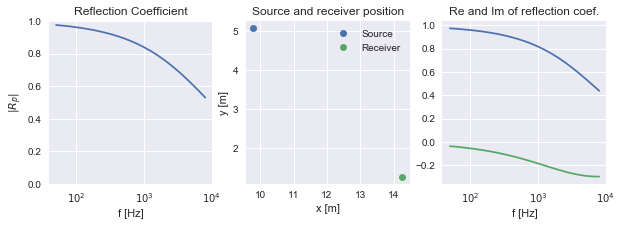

In [39]:
# Frequency
n = 23
f = np.logspace(np.log10(50), np.log10(8000), n)  # Frequency
omega = math.pi * 2 * f                           # Angular frequency

# Source and receiver coordinates
s = np.array([9.78,  5.06])
si = [s[0], -s[1]]
r = np.array([14.26, 1.27])
r1 = np.linalg.norm(np.subtract(s, r))
r2 = np.linalg.norm(np.subtract(si, r))

# Angle of incidence
alpha = math.pi / 2 - math.acos(np.abs(r[0] - s[0]) / r2)

# Ground truth values
sigma = 700000                                                  # Flow Resistivity
T = 25                                                          # Temperature
c = 20.05 * np.sqrt(273.15 + T)                                 # Speed of sound
rho = 1.2                                                       # Density of air
k = omega / c                                                   # Wave number
Zs = 1 + 5.51 * (1000 * f / sigma)**(-0.632) \
      - 8.42j * (1000 * f / sigma)**(-0.632)                    # Surface impedance according to the empirical model
Rp = (Zs * np.cos(alpha) - 1) / (Zs * np.cos(alpha) + 1)        # Reflection coefficient

# Signal and source responses
P1 = np.ones(n, dtype=np.float) / r1 * np.exp(1j * k * r1)      # Direct pressure contribution  (not used)
H1 = np.ones(n, dtype=np.float)                                 # Source transfer function in the direct path
H2 = np.ones(n, dtype=np.float)                                 # Source transfer function in the reflected path

# Pressure
Dr = r2 - r1                                                    # delta_r
pt_clean = (H1 + Rp * H2 * r1 / r2 * np.exp(1j * k * Dr))       # The ground effect P_t / P_1

# Noise
SNR = 30                                                        # Signal to noise ratio
An = abs(1 / 10**(SNR / 20))                                    # Noise Amplitude
Phin = np.random.uniform(-math.pi, math.pi, len(f))             # Noise phase
epsilon = An * np.exp(1j * Phin)                                # Noise contribution

# Pressure with noise
pt = pt_clean + epsilon                    
pt_real = np.real(pt)
pt_imag = np.imag(pt)

# Measurement uncertainties
T_dev = 0.2                # Standard deviation of temperature measurement
r_dev = 0.015              # Error of the instrument
r_man_dev = 0.3            # Error due to manipulation
r_tot = r_dev + r_man_dev  # Total position measurement error
sigma_mean = 500000        # Prior guess of the flow resistivity
sigma_dev = 500000         # Deviation of the flow resistivity.

## Plot
plt.figure(None, (10, 3))

plt.subplot(1, 3, 1)
plt.title('Reflection Coefficient')
plt.plot(f, np.abs(Rp))
plt.xlabel('f [Hz]')
plt.ylabel(r'$|R_p|$')
plt.xscale('log')

plt.ylim(0, 1)

plt.subplot(1, 3, 2)
plt.title("Source and receiver position")
plt.plot(s[0], s[1],'o')
plt.plot(r[0], r[1],'o')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')
plt.legend(['Source', 'Receiver'])


plt.subplot(1, 3, 3)
plt.title("Re and Im of reflection coef.")
plt.plot(f, np.real(Rp))
plt.plot(f, np.imag(Rp))
plt.xlabel('f [Hz]')
plt.xscale('log')

**Comment:** The behavior of the reflection coefficient is the one for a porous absorber, being effective from mid to high frequencies. The source and receivers are placed in a fashion which resembles sound coming from a stage and a receiver mic placed directly in front of the stage.

The real part of the reflection coefficient is the most relevant, accounting for the loss of energy in the sound field. The imaginary part accounts for the phase change in the reflection process, and for the use of music purposes it has to be taken into account.

## 3. Inference

When passing parameter values through the model we obtain pressure and phase estimates for the sound signal at the receiver. In a forward model we estimate the receiver signal using likely parameter values. In the following we demonstrate that we can produce a much more precise estimate using an inverse model approach powered by Bayesian inference.

### Forward model

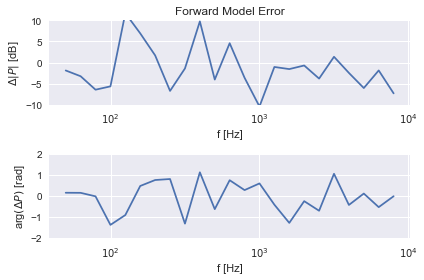

In [43]:
# Measured data with errors (Synthetic data)
Tm = np.random.normal(T, T_dev)
sm = np.random.normal(s, r_tot)
sim = [sm[0],-sm[1]]
rm = np.random.normal(r, r_tot)
alpham = math.pi/2-math.acos(np.abs(rm[0]-sm[0])/r2)
D = len(rm) # Dimensions
##
## Noisy Results
r1m = np.linalg.norm(np.subtract(sm,rm))
r2m = np.linalg.norm(np.subtract(sim,rm))
cm = 20.05*np.sqrt(273.15+Tm)
km = 2*math.pi*f/cm
Zs = (1+5.51*(1000*f/sigma_mean)**(-0.632)-8.42j*(1000*f/sigma_mean)**(-0.632))
Rpm = (Zs*np.cos(alpham)-1)/(Zs*np.cos(alpham)+1)
## Signal and source responses
Dr=r2m-r1m
pt_forward= (H1+Rpm*H2*r1m/r2m*np.exp(1j*km*Dr))
p_diff_forward = pt_clean/pt_forward
# Plot
plt.figure()
plt.subplot(2,1,1)
plt.title('Forward Model Error')
plt.plot(f,20*np.log10(abs(p_diff_forward)))
plt.xscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\Delta |P|$ [dB]')
plt.ylim(-10,10)

plt.subplot(2,1,2)
plt.plot(f,np.angle(p_diff_forward))
plt.xscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'arg$(\Delta P)$ [rad]')

plt.ylim(-2,2)
plt.tight_layout()

**Comment:** Looking at the error between the forward prediction and the actual clean sound pressure that will be recorded, it can be seen that deviation of $\pm$10 dB in amplitude and $\pi/2$ radians in the phase, which is not possible for music purposes. A deviation of 6 dB is equal to doublin the sound pressure and those changes in phase will be noticed as artifacts in the music signal. A good estimation will be that one which reduces the error to one Just Noticeable Difference (JND), which is usually a deviation of 1 dB. 

### Bayesian model

#### Priors

The flow resistivity is a physical parameter which is always greater or equal to 0. Therefore, a truncated gaussian distribution is used. In the rest of the parameters no restrictions are taken into account, so normal distributions with mean the value measured with the devices and deviation the one considered in the different intrument's datasheets are taken into account.

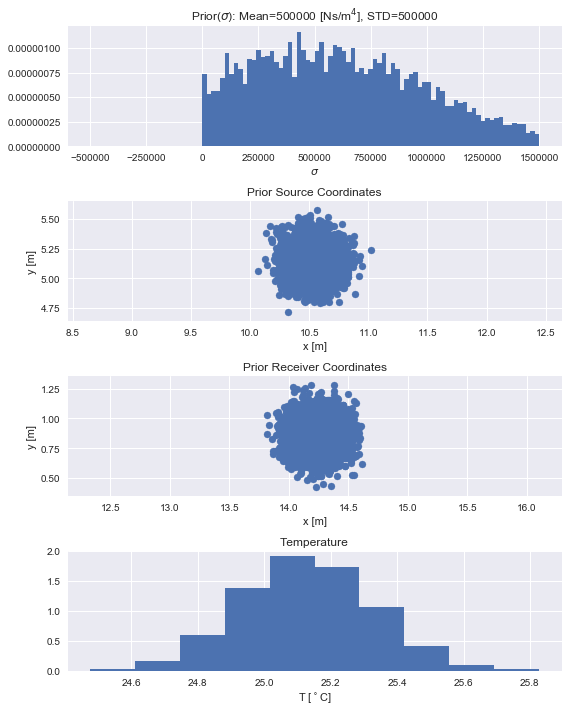

In [64]:
plt.figure(figsize=(8, 10))

# Sigma prior
plt.subplot(4, 1, 1)
plt.title(r'Prior($\sigma$): Mean=' + str(sigma_mean) + ' [Ns/m$^4$], STD=' + str(sigma_dev))
Ss = np.random.normal(sigma_mean, sigma_dev, 4000)
Ss = Ss[Ss>0]
plt.hist(
    Ss,
    bins=np.linspace(sigma_mean - 2 * sigma_dev, sigma_mean + 2 * sigma_dev, 101), 
    normed=True
)
plt.xlabel(r'$\sigma$')

# Source coordinates prior
plt.subplot(4, 1, 2)
plt.title(r'Prior Source Coordinates')
cov = [[r_dev, 0], [0, r_dev]]
x = np.random.multivariate_normal(sm, cov, 4000)
plt.scatter(x[:, 0], x[:, 1])
plt.axis('equal')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')

# Receiver coordinates prior
plt.subplot(4, 1, 3)
plt.title(r'Prior Receiver Coordinates')
x = np.random.multivariate_normal(rm, cov, 4000)
plt.scatter(x[:, 0], x[:, 1])
plt.axis('equal')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')

# Temperature prior
plt.subplot(4, 1, 4)
plt.title('Temperature')
hT = np.random.normal(Tm, T_dev, 4000)
plt.hist(hT, normed=True)
plt.xlabel(r'T [$^\circ$C]')


plt.tight_layout()
plt.show()

#### Modeling $\sigma$ and coordinates

In the following section, the STAN implementation is presented. It can be seen that the idea is to find the solution that maximizes the likelihood and therefore the posterior. When working with normal distributions, this implies that the exponent of the gaussian distribution is as close to zero as possible. Therefore, the measured and the inferred pressure are the same.

The inferred parameters (flow resistivity, temperature and coordinates) are conditioned to the maximization of the posterior for the real and the imaginary part. The background noise is modelled independently for both real and imaginary parts with uniform distributed variances. Vectorization is used to speed up the calculations.

The deviation of the coordinates is common for both source and receivers, as they've been measured with the same device.

In [74]:
data = dict(
    N = len(f),         
    D = D,         
    f = f,        
    omega = omega,        
    pt_real = pt_real,         
    pt_imag = pt_imag,        
    T = Tm,        
    T_mean = Tm,         
    T_dev = T_dev,         
    rho = rho,         
    r = r,        
    r_mean = rm,        
    s_mean = sm,         
    r_dev = r_tot,
    sigma_mean = sigma_mean,         
    sigma_dev = sigma_dev,    
)

reflection_coef = """
data {
    int<lower=0> N;         // number of frequencies
    int<lower=0> D;         // Dimensions for coordinates
    vector[D] s_mean;       // Coordinates source. Prior mean
    vector[D] r_mean;       // Coordinates receiver. Prior mean
    vector[N] pt_real;      // Measured Pressure at receiver. Real part
    vector[N] pt_imag;      // Measured Pressure at receiver. Imaginary part
    vector[N] f;            // frequencies
    vector[N] omega;        // wavelengths
    real T_mean;            // Temperature. Prior mean
    real T_dev;             // Temperature deviation
    real r_dev;             // Distance deviation
    real sigma_mean;        // Nordtest approximation. Prior mean
    real sigma_dev;         // Sigma deviation
    real rho;               // density
}
parameters {
    real<lower=0> sigma;  // Flow resistivity greater than 0
    vector[D] s;            // coordinates source
    vector[D] r;            // coordinates receiver
    real<lower=0> T;        // Temperature
    real epsilon_real;      // variance of the banckground noise
    real epsilon_imag;      // variance of the banckground noise
}
model {
    vector[N] A;
    vector[N] B;
    vector[N] Rpr;
    vector[N] Rpi;
    vector[N] den;
    vector[N] mu_real;
    vector[N] mu_imag;
    real r1;
    real r2;
    real alpha;
    real Dr;
    real c;
    real k;
  
    
    s ~ normal(s_mean,r_dev); // Prior for source coordinates
    r ~ normal(r_mean,r_dev); // Prior for source coordinates
    r1 = sqrt((s[1]-r[1])^2+(s[2]-r[2])^2); // Direct path
    r2 = sqrt((s[1]-r[1])^2+(-s[2]-r[2])^2); // Reflected path
    alpha = pi()/2-atan(fabs(s[2]+r[2])/fabs(s[1]-r[1])); // Angle of incidence
    Dr = r2-r1 ;
    
    sigma ~ normal(sigma_mean, sigma_dev);
    T ~ normal(T_mean,T_dev);
    c = 20.05*sqrt(273.15+T);
    for (n in 1:N){
        k = omega[n]/c;
        A[n] = 1+5.51*(1000*f[n]/sigma)^(-0.632);
        B[n] = -8.42*(1000*f[n]/sigma)^(-0.632);
        den[n] = (A[n]*cos(alpha)+1)^2+(B[n]*cos(alpha))^2;
        Rpr[n] = ((A[n]^2+B[n]^2)*cos(alpha)^2-1)/den[n];
        Rpi[n] = (2*B[n]*cos(alpha))/den[n];
        mu_real[n] = 1+r1/r2*(Rpr[n]*cos(k*Dr)-Rpi[n]*sin(k*Dr));
        mu_imag[n] = r1/r2*(Rpr[n]*sin(k*Dr)+Rpi[n]*cos(k*Dr));
    }
    pt_real ~ normal(mu_real, epsilon_real); 
    pt_imag ~ normal(mu_imag, epsilon_imag); 
    
}
"""

fit_model = pystan.StanModel(model_code=reflection_coef)
fit = fit_model.sampling(data=data)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3caef0c44230d2a87a979bb7e2475ec4 NOW.


In [75]:
fit

Inference for Stan model: anon_model_3caef0c44230d2a87a979bb7e2475ec4.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

               mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
sigma         7.2e5  2078.4  5.8e4  6.1e5  6.8e5  7.2e5  7.6e5  8.5e5    774    1.0
s[0]          10.44    0.01   0.29   9.88  10.24  10.43  10.63  11.02    774    1.0
s[1]           5.32    0.01   0.25   4.82   5.14   5.32   5.48   5.83    540   1.01
r[0]          14.32    0.01   0.28  13.76  14.13  14.33  14.51  14.87    714    1.0
r[1]           1.18  2.4e-3   0.05   1.08   1.14   1.18   1.21   1.29    470    1.0
T             25.13  5.3e-3   0.19  24.74   25.0  25.13  25.26   25.5   1363    1.0
epsilon_real   0.03  1.4e-4 4.6e-3   0.02   0.02   0.03   0.03   0.04   1147    1.0
epsilon_imag   0.02  9.0e-5 3.5e-3   0.02   0.02   0.02   0.02   0.03   1529    1.0
lp__         164.82    0.07    2.2 159.58 163.68 165.18

**Comment:** The MCMC sampling process converges nicely as evidenced by the Rhat values reaching 1.0 for all the modeled parameters. When decreasing the SNR this will start to have problems in the convergence, as the noise is dominating. In addition, when the ratio $r_1/r_2$ is too low, the real and imaginary parts are also too conditioned by the additive noise and therefore, it is difficult for the MCMC to converge.

#### Plots

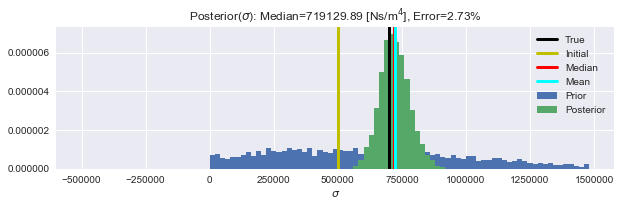

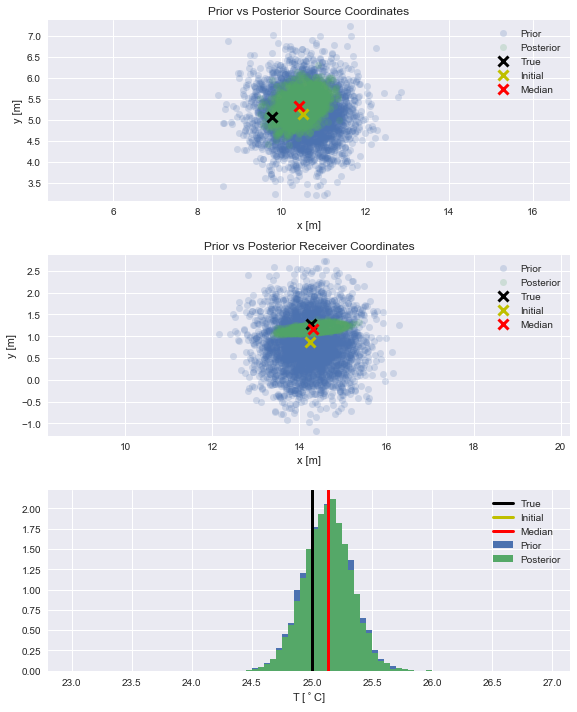

In [77]:
samples = fit.extract(permuted=True)

## Sigma
sigma_mean_post = np.mean(samples['sigma'])
sigma_std_post = (np.std(samples['sigma'])-sigma)/sigma*100
sigma_median = np.median(samples['sigma'])
sigma_error = abs(round((sigma_median-sigma)/sigma*100,2))
plt.figure(figsize=(10,12))
plt.subplot(4,1,1)
Ss = np.random.normal(sigma_mean,sigma_dev,4000)
Ss = Ss[Ss>0]
plt.hist(Ss,normed=True,bins=np.arange(sigma_mean-2*sigma_dev, sigma_mean+2*sigma_dev, 4*sigma_mean/100))
plt.hist(fit['sigma'],bins=np.arange(sigma_mean-2*sigma_dev, sigma_mean+2*sigma_dev, 4*sigma_mean/100),normed=True)
plt.axvline(x=sigma,color='k',linewidth=3)
plt.axvline(x=sigma_mean,color='y',linewidth=3)
plt.axvline(x=sigma_median,color='r',linewidth=3)
plt.title(r'Posterior($\sigma$): Median='+str(round(sigma_median,2))+' [Ns/m$^4$], Error='+str(sigma_error)+'%')
plt.axvline(x=sigma_mean_post,color='cyan',linewidth=3)

plt.xlabel(r'$\sigma$')
plt.legend(['True','Initial','Median','Mean','Prior','Posterior'])

## Coordinates
s_post_median = np.median(samples['s'],0)
r_post_median = np.median(samples['r'],0)

cov = [[r_tot, 0],[0 ,r_tot]]
x = np.random.multivariate_normal(sm,cov,4000)
plt.figure(figsize=(8,10))
plt.subplot(3,1,1)
A1,=plt.plot(x[:,0],x[:,1],'o',alpha=.2)
A2,=plt.plot(samples['s'][:,0],samples['s'][:,1],'o',alpha=.2)
A3,=plt.plot(s[0],s[1],'x', color='k',ms=10,mew=3)
A4,=plt.plot(sm[0],sm[1],'x', color='y',ms=10,mew=3)
A5,=plt.plot(s_post_median[0],s_post_median[1],'x', color='r',ms=10,mew=3)
plt.axis('equal')
plt.title(r'Prior vs Posterior Source Coordinates')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')
plt.legend([A1,A2,A3,A4,A5],['Prior','Posterior','True','Initial','Median'])



plt.subplot(3,1,2)
x = np.random.multivariate_normal(rm,cov,4000)
A,=plt.plot(x[:,0],x[:,1],'o',alpha=.2)
A2,=plt.plot(samples['r'][:,0],samples['r'][:,1],'o',alpha=.2)
A3,=plt.plot(r[0],r[1],'x', color='k',ms=10,mew=3)
A4,=plt.plot(rm[0],rm[1],'x', color='y',ms=10,mew=3)
A5,=plt.plot(r_post_median[0],r_post_median[1],'x', color='r',ms=10,mew=3)
plt.axis('equal')
plt.title(r'Prior vs Posterior Receiver Coordinates')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')
plt.legend([A1,A2,A3,A4,A5],['Prior','Posterior','True','Initial','Median'])




## Temperature
T_post_median = np.median(samples['T'])
plt.subplot(3,1,3)
plt.hist(hT,normed=True,bins=np.arange(23,27,0.05))
plt.hist(fit['T'],normed=True,bins=np.arange(23,27,0.05))

plt.xlabel(r'T [$^\circ$C]')
plt.axvline(x=T,color='k',linewidth=3)
plt.axvline(x=Tm,color='y',linewidth=3)
plt.axvline(x=T_post_median,color='r',linewidth=3)
plt.legend(['True','Initial','Median','Prior','Posterior'])
plt.show
plt.tight_layout()


**Comment:** The use of the Bayesian framework is very useful for the study of acoustic physical phenomena because the sensitivity of the process with the parameters and the uncertainties are clearly shown. In this particular case, it is possible to see how sigma presents a good inference, showing a narrow posterior around the true value and letting the prior mean out of the posterior (proving that it was a bad guess). 

The coordinates of source and receiver are also quite important for the convergence, shrinking into narrow posteriors that consider the true value but not necessarily the value used in the forward prediction.

Finally, temperature doesn't seem to change between prior and posterior, which implies that the model is not sensitive to small deviations in the prior assumption. This can be used to low the computational load when processing music in real time in concerts because the temperature can be taken as true directly from the temperature.

As point estimates are necessary when processing music concerts, the median of the posterior distributions are taken into account. Specially for the inference of the flow resistivity, where the posterior shows a skewed distribution. It is important to mention that the optimizing function available in the STAN platform was also used, in order to get the MAP. However, due to the implementation of the procedure in STAN, poor results were achieved, and this option discarded.

#### Forward vs Updated

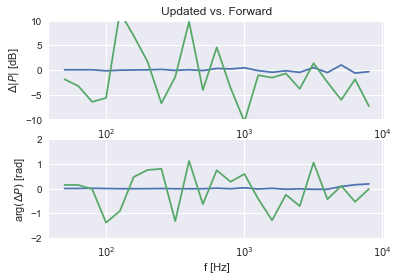

In [61]:
# Measured data with errors (Synthetic data)

si_map = [s_post_median[0],-s_post_median[1]]
## Inferred Results
r1_map = np.linalg.norm(np.subtract(s_post_median,r_post_median))
r2_map = np.linalg.norm(np.subtract(si_map,r_post_median))
c_map = 20.05*np.sqrt(273.15+T_post_median)
k_map = 2*math.pi*f/c_map
Zs = (1+5.51*(1000*f/sigma_median)**(-0.632)-8.42j*(1000*f/sigma_median)**(-0.632))
alpha_map = math.pi/2-np.arccos(np.abs(r_post_median[0]-s_post_median[0])/r2_map)
Rp_map = (Zs*np.cos(alpha_map)-1)/(Zs*np.cos(alpha_map)+1)
## Signal and source responses
Dr_map=r2_map-r1_map
pt_updated= (H1+Rp_map*H2*r1_map/r2_map*np.exp(1j*k_map*Dr_map))

plt.figure()
plt.subplot(2,1,1)
plt.title('Updated vs. Forward')
p_diff = pt_clean/pt_updated
p_diff_forward = pt_clean/pt_forward
plt.plot(f,20*np.log10(abs(p_diff)))
plt.plot(f,20*np.log10(abs(p_diff_forward)))
plt.xscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\Delta |P|$ [dB]')
plt.ylim(-10,10)

plt.subplot(2,1,2)
plt.plot(f,np.angle(p_diff))
plt.plot(f,np.angle(p_diff_forward))
plt.xscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'arg$(\Delta P)$ [rad]')
plt.ylim(-2,2)
plt.show()


In comparison to the frequency dependent error rates for the forward model, we note here that the Bayesian modeling approach performs much more accurate estimates of the receiver signal (the error is almost 0 for amplitude and phase). It can be seen that the error will still be present at high frequencies til some extent, getting close to one JND. This is due to the fact that errors in the estimation of the source and receiver coordinates lead to deviation in $\Delta r$. The effect of this error will tend to be higher at high frequencies because it will start to be relative to the wavelength. Therefore, when $\Delta r\sim \frac{1}{k}$, the error is noticeable.

In conclusion we have demonstrated with this simple case study that a Bayesian modeling approach to estimating sound the sound signal at a receiver pole, is far more accurate than one that uses standard parameters learned empirically. We furthermore show that this approach can provide crucial knowledge about acoustic parameters such as the flow resistivity of the surface material, $\sigma$, as we as well as source and receiver positions in a large event.

# Case 2: SNR 20 dB

In this new case a lower Signal to Noise Ratio is applied for the same setup. A SNR = 20 dB is a really extreme case for acoustic purposes.

## Imports

In [80]:
%matplotlib inline
from __future__ import division
import numpy as np
import scipy as sc
import pystan
from psis import psisloo
import math
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from matplotlib import gridspec

## 2. Synthetic data

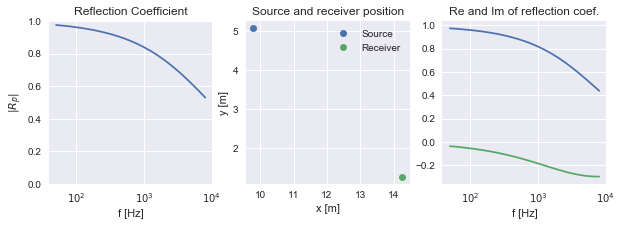

In [81]:
# Frequency
n = 23
f = np.logspace(np.log10(50), np.log10(8000), n)  # Frequency
omega = math.pi * 2 * f                           # Angular frequency

# Source and receiver coordinates
s = np.array([9.78,  5.06])
si = [s[0], -s[1]]
r = np.array([14.26, 1.27])
r1 = np.linalg.norm(np.subtract(s, r))
r2 = np.linalg.norm(np.subtract(si, r))

# Angle of incidence
alpha = math.pi / 2 - math.acos(np.abs(r[0] - s[0]) / r2)

# Ground truth values
sigma = 700000                                                  # Flow Resistivity
T = 25                                                          # Temperature
c = 20.05 * np.sqrt(273.15 + T)                                 # Speed of sound
rho = 1.2                                                       # Density of air
k = omega / c                                                   # Wave number
Zs = 1 + 5.51 * (1000 * f / sigma)**(-0.632) \
      - 8.42j * (1000 * f / sigma)**(-0.632)                    # Surface impedance according to the empirical model
Rp = (Zs * np.cos(alpha) - 1) / (Zs * np.cos(alpha) + 1)        # Reflection coefficient

# Signal and source responses
P1 = np.ones(n, dtype=np.float) / r1 * np.exp(1j * k * r1)      # Direct pressure contribution  (not used)
H1 = np.ones(n, dtype=np.float)                                 # Source transfer function in the direct path
H2 = np.ones(n, dtype=np.float)                                 # Source transfer function in the reflected path

# Pressure
Dr = r2 - r1                                                    # delta_r
pt_clean = (H1 + Rp * H2 * r1 / r2 * np.exp(1j * k * Dr))       # The ground effect P_t / P_1

# Noise
SNR = 20                                                        # Signal to noise ratio
An = abs(1 / 10**(SNR / 20))                                    # Noise Amplitude
Phin = np.random.uniform(-math.pi, math.pi, len(f))             # Noise phase
epsilon = An * np.exp(1j * Phin)                                # Noise contribution

# Pressure with noise
pt = pt_clean + epsilon                    
pt_real = np.real(pt)
pt_imag = np.imag(pt)

# Measurement uncertainties
T_dev = 0.2                # Standard deviation of temperature measurement
r_dev = 0.015              # Error of the instrument
r_man_dev = 0.3            # Error due to manipulation
r_tot = r_dev + r_man_dev  # Total position measurement error
sigma_mean = 500000        # Prior guess of the flow resistivity
sigma_dev = 500000         # Deviation of the flow resistivity.

## Plot
plt.figure(None, (10, 3))

plt.subplot(1, 3, 1)
plt.title('Reflection Coefficient')
plt.plot(f, np.abs(Rp))
plt.xlabel('f [Hz]')
plt.ylabel(r'$|R_p|$')
plt.xscale('log')

plt.ylim(0, 1)

plt.subplot(1, 3, 2)
plt.title("Source and receiver position")
plt.plot(s[0], s[1],'o')
plt.plot(r[0], r[1],'o')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')
plt.legend(['Source', 'Receiver'])


plt.subplot(1, 3, 3)
plt.title("Re and Im of reflection coef.")
plt.plot(f, np.real(Rp))
plt.plot(f, np.imag(Rp))
plt.xlabel('f [Hz]')
plt.xscale('log')

**Comment:** The behavior of the reflection coefficient is the one for a porous absorber, being effective from mid to high frequencies. The source and receivers are placed in a fashion which resembles sound coming from a stage and a receiver mic placed directly in front of the stage.

The real part of the reflection coefficient is the most relevant, accounting for the loss of energy in the sound field. The imaginary part accounts for the phase change in the reflection process, and for the use of music purposes it has to be taken into account.

## 3. Inference

### Forward model

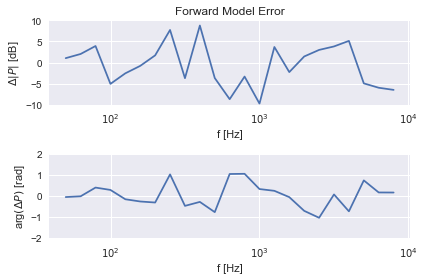

In [82]:
# Measured data with errors (Synthetic data)
Tm = np.random.normal(T, T_dev)
sm = np.random.normal(s, r_tot)
sim = [sm[0],-sm[1]]
rm = np.random.normal(r, r_tot)
alpham = math.pi/2-math.acos(np.abs(rm[0]-sm[0])/r2)
D = len(rm) # Dimensions
##
## Noisy Results
r1m = np.linalg.norm(np.subtract(sm,rm))
r2m = np.linalg.norm(np.subtract(sim,rm))
cm = 20.05*np.sqrt(273.15+Tm)
km = 2*math.pi*f/cm
Zs = (1+5.51*(1000*f/sigma_mean)**(-0.632)-8.42j*(1000*f/sigma_mean)**(-0.632))
Rpm = (Zs*np.cos(alpham)-1)/(Zs*np.cos(alpham)+1)
## Signal and source responses
Dr=r2m-r1m
pt_forward= (H1+Rpm*H2*r1m/r2m*np.exp(1j*km*Dr))
p_diff_forward = pt_clean/pt_forward
# Plot
plt.figure()
plt.subplot(2,1,1)
plt.title('Forward Model Error')
plt.plot(f,20*np.log10(abs(p_diff_forward)))
plt.xscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\Delta |P|$ [dB]')
plt.ylim(-10,10)

plt.subplot(2,1,2)
plt.plot(f,np.angle(p_diff_forward))
plt.xscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'arg$(\Delta P)$ [rad]')

plt.ylim(-2,2)
plt.tight_layout()

### Bayesian model

#### Modeling $\sigma$ and coordinates

In [84]:
data = dict(
    N = len(f),         
    D = D,         
    f = f,        
    omega = omega,        
    pt_real = pt_real,         
    pt_imag = pt_imag,        
    T = Tm,        
    T_mean = Tm,         
    T_dev = T_dev,         
    rho = rho,         
    r = r,        
    r_mean = rm,        
    s_mean = sm,         
    r_dev = r_tot,
    sigma_mean = sigma_mean,         
    sigma_dev = sigma_dev,    
)

reflection_coef = """
data {
    int<lower=0> N;         // number of frequencies
    int<lower=0> D;         // Dimensions for coordinates
    vector[D] s_mean;       // Coordinates source. Prior mean
    vector[D] r_mean;       // Coordinates receiver. Prior mean
    vector[N] pt_real;      // Measured Pressure at receiver. Real part
    vector[N] pt_imag;      // Measured Pressure at receiver. Imaginary part
    vector[N] f;            // frequencies
    vector[N] omega;        // wavelengths
    real T_mean;            // Temperature. Prior mean
    real T_dev;             // Temperature deviation
    real r_dev;             // Distance deviation
    real sigma_mean;        // Nordtest approximation. Prior mean
    real sigma_dev;         // Sigma deviation
    real rho;               // density
}
parameters {
    real<lower=0> sigma;  // Flow resistivity greater than 0
    vector[D] s;            // coordinates source
    vector[D] r;            // coordinates receiver
    real<lower=0> T;        // Temperature
    real epsilon_real;      // variance of the banckground noise
    real epsilon_imag;      // variance of the banckground noise
}
model {
    vector[N] A;
    vector[N] B;
    vector[N] Rpr;
    vector[N] Rpi;
    vector[N] den;
    vector[N] mu_real;
    vector[N] mu_imag;
    real r1;
    real r2;
    real alpha;
    real Dr;
    real c;
    real k;
  
    
    s ~ normal(s_mean,r_dev); // Prior for source coordinates
    r ~ normal(r_mean,r_dev); // Prior for source coordinates
    r1 = sqrt((s[1]-r[1])^2+(s[2]-r[2])^2); // Direct path
    r2 = sqrt((s[1]-r[1])^2+(-s[2]-r[2])^2); // Reflected path
    alpha = pi()/2-atan(fabs(s[2]+r[2])/fabs(s[1]-r[1])); // Angle of incidence
    Dr = r2-r1 ;
    
    sigma ~ normal(sigma_mean, sigma_dev);
    T ~ normal(T_mean,T_dev);
    c = 20.05*sqrt(273.15+T);
    for (n in 1:N){
        k = omega[n]/c;
        A[n] = 1+5.51*(1000*f[n]/sigma)^(-0.632);
        B[n] = -8.42*(1000*f[n]/sigma)^(-0.632);
        den[n] = (A[n]*cos(alpha)+1)^2+(B[n]*cos(alpha))^2;
        Rpr[n] = ((A[n]^2+B[n]^2)*cos(alpha)^2-1)/den[n];
        Rpi[n] = (2*B[n]*cos(alpha))/den[n];
        mu_real[n] = 1+r1/r2*(Rpr[n]*cos(k*Dr)-Rpi[n]*sin(k*Dr));
        mu_imag[n] = r1/r2*(Rpr[n]*sin(k*Dr)+Rpi[n]*cos(k*Dr));
    }
    pt_real ~ normal(mu_real, epsilon_real); 
    pt_imag ~ normal(mu_imag, epsilon_imag); 
    
}
"""

fit_model = pystan.StanModel(model_code=reflection_coef)
fit = fit_model.sampling(data=data)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_78ac54763ad884bb73ee5bc7773d1ad4 NOW.


In [85]:
fit

Inference for Stan model: anon_model_78ac54763ad884bb73ee5bc7773d1ad4.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

               mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
sigma         6.0e5   2.6e5  3.7e5   0.63  1.8e5  7.2e5  8.5e5  1.1e6      2   2.99
s[0]          10.01    0.78    1.1   8.82   9.26   9.53  10.88   12.1      2   4.09
s[1]           4.63    1.07   1.52   1.72   3.42   5.36   5.64   6.03      2   5.71
r[0]          13.62    0.75   1.06  11.57  12.85  14.08  14.34  14.77      2   3.95
r[1]           0.41    1.06    1.5  -2.46  -0.41   1.24   1.29   1.39      2  13.74
T             25.55  9.9e-3    0.2  25.17  25.41  25.55  25.69  25.95    419   1.02
epsilon_real   0.18    0.12   0.17   0.06   0.07   0.08   0.22   0.56      2   4.54
epsilon_imag   0.18    0.13   0.19   0.05   0.06   0.07   0.24    0.6      2   4.76
lp__          39.11   88.99 125.85 -181.3 -51.26 111.21

**Comment:** The MCMC sampling process converges nicely as evidenced by the Rhat values reaching 1.0 for all the modeled parameters. When decreasing the SNR this will start to have problems in the convergence, as the noise is dominating. In addition, when the ratio $r_1/r_2$ is too low, the real and imaginary parts are also too conditioned by the additive noise and therefore, it is difficult for the MCMC to converge.

#### Plots

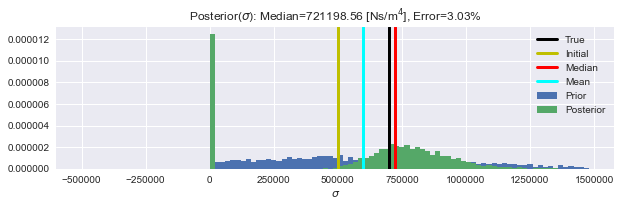

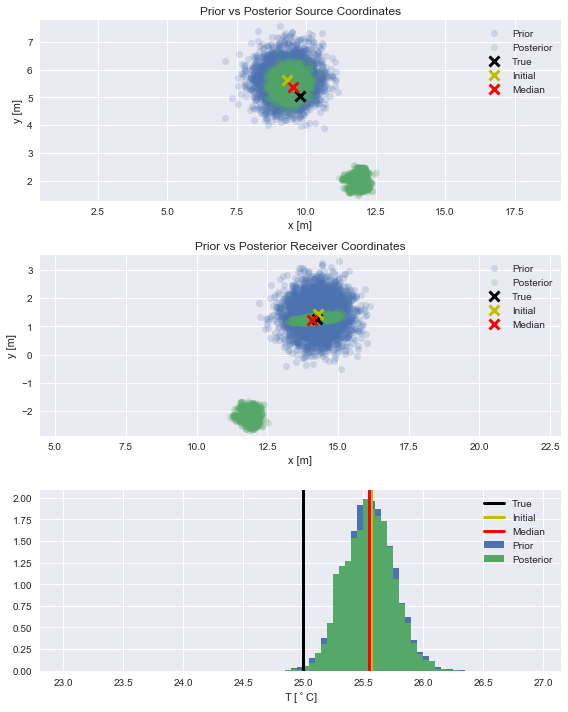

In [86]:
samples = fit.extract(permuted=True)

## Sigma
sigma_mean_post = np.mean(samples['sigma'])
sigma_std_post = (np.std(samples['sigma'])-sigma)/sigma*100
sigma_median = np.median(samples['sigma'])
sigma_error = abs(round((sigma_median-sigma)/sigma*100,2))
plt.figure(figsize=(10,12))
plt.subplot(4,1,1)
Ss = np.random.normal(sigma_mean,sigma_dev,4000)
Ss = Ss[Ss>0]
plt.hist(Ss,normed=True,bins=np.arange(sigma_mean-2*sigma_dev, sigma_mean+2*sigma_dev, 4*sigma_mean/100))
plt.hist(fit['sigma'],bins=np.arange(sigma_mean-2*sigma_dev, sigma_mean+2*sigma_dev, 4*sigma_mean/100),normed=True)
plt.axvline(x=sigma,color='k',linewidth=3)
plt.axvline(x=sigma_mean,color='y',linewidth=3)
plt.axvline(x=sigma_median,color='r',linewidth=3)
plt.title(r'Posterior($\sigma$): Median='+str(round(sigma_median,2))+' [Ns/m$^4$], Error='+str(sigma_error)+'%')
plt.axvline(x=sigma_mean_post,color='cyan',linewidth=3)

plt.xlabel(r'$\sigma$')
plt.legend(['True','Initial','Median','Mean','Prior','Posterior'])

## Coordinates
s_post_median = np.median(samples['s'],0)
r_post_median = np.median(samples['r'],0)

cov = [[r_tot, 0],[0 ,r_tot]]
x = np.random.multivariate_normal(sm,cov,4000)
plt.figure(figsize=(8,10))
plt.subplot(3,1,1)
A1,=plt.plot(x[:,0],x[:,1],'o',alpha=.2)
A2,=plt.plot(samples['s'][:,0],samples['s'][:,1],'o',alpha=.2)
A3,=plt.plot(s[0],s[1],'x', color='k',ms=10,mew=3)
A4,=plt.plot(sm[0],sm[1],'x', color='y',ms=10,mew=3)
A5,=plt.plot(s_post_median[0],s_post_median[1],'x', color='r',ms=10,mew=3)
plt.axis('equal')
plt.title(r'Prior vs Posterior Source Coordinates')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')
plt.legend([A1,A2,A3,A4,A5],['Prior','Posterior','True','Initial','Median'])



plt.subplot(3,1,2)
x = np.random.multivariate_normal(rm,cov,4000)
A,=plt.plot(x[:,0],x[:,1],'o',alpha=.2)
A2,=plt.plot(samples['r'][:,0],samples['r'][:,1],'o',alpha=.2)
A3,=plt.plot(r[0],r[1],'x', color='k',ms=10,mew=3)
A4,=plt.plot(rm[0],rm[1],'x', color='y',ms=10,mew=3)
A5,=plt.plot(r_post_median[0],r_post_median[1],'x', color='r',ms=10,mew=3)
plt.axis('equal')
plt.title(r'Prior vs Posterior Receiver Coordinates')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')
plt.legend([A1,A2,A3,A4,A5],['Prior','Posterior','True','Initial','Median'])




## Temperature
T_post_median = np.median(samples['T'])
plt.subplot(3,1,3)
plt.hist(hT,normed=True,bins=np.arange(23,27,0.05))
plt.hist(fit['T'],normed=True,bins=np.arange(23,27,0.05))

plt.xlabel(r'T [$^\circ$C]')
plt.axvline(x=T,color='k',linewidth=3)
plt.axvline(x=Tm,color='y',linewidth=3)
plt.axvline(x=T_post_median,color='r',linewidth=3)
plt.legend(['True','Initial','Median','Prior','Posterior'])
plt.show
plt.tight_layout()


**Comment:** For this particular case the posterior distributions start to show multimodal behaviors and lack of convergence according to Rhat. This was anticipated before as an effect of increasing the background noise at receiver point. In addition, it is also a good example to select the good point estimates in order to have a good estimation of the transfer function between source and receiver. As it was discussed during the presentation, a better solution for this kind of behavior will be to choose the median instead of the mean. Even though it is not recommended to trust point estimates in Bayesian inference (because it loses all the strength of this framework), it can be seen that the median and the true value are still quite similar, while the mean is off due to the new mode. This ends in a fair agreement for frequencies below 1000 Hz in the following plots when comparing the error of the forward and the updated model. 

However, to build a robust model for real time music processing it will be too risky to trust this results according to the bad convergence in Rhat.

#### Forward vs Updated

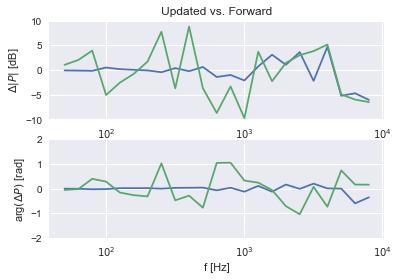

In [87]:
# Measured data with errors (Synthetic data)

si_map = [s_post_median[0],-s_post_median[1]]
## Inferred Results
r1_map = np.linalg.norm(np.subtract(s_post_median,r_post_median))
r2_map = np.linalg.norm(np.subtract(si_map,r_post_median))
c_map = 20.05*np.sqrt(273.15+T_post_median)
k_map = 2*math.pi*f/c_map
Zs = (1+5.51*(1000*f/sigma_median)**(-0.632)-8.42j*(1000*f/sigma_median)**(-0.632))
alpha_map = math.pi/2-np.arccos(np.abs(r_post_median[0]-s_post_median[0])/r2_map)
Rp_map = (Zs*np.cos(alpha_map)-1)/(Zs*np.cos(alpha_map)+1)
## Signal and source responses
Dr_map=r2_map-r1_map
pt_updated= (H1+Rp_map*H2*r1_map/r2_map*np.exp(1j*k_map*Dr_map))

plt.figure()
plt.subplot(2,1,1)
plt.title('Updated vs. Forward')
p_diff = pt_clean/pt_updated
p_diff_forward = pt_clean/pt_forward
plt.plot(f,20*np.log10(abs(p_diff)))
plt.plot(f,20*np.log10(abs(p_diff_forward)))
plt.xscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\Delta |P|$ [dB]')
plt.ylim(-10,10)

plt.subplot(2,1,2)
plt.plot(f,np.angle(p_diff))
plt.plot(f,np.angle(p_diff_forward))
plt.xscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'arg$(\Delta P)$ [rad]')
plt.ylim(-2,2)
plt.show()
